In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from glob import glob
import os
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

# 데이터 불러오기

In [5]:
df_member = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/member_data.csv')
df1 = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/product_data_001.csv')
df2 = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/product_data_002.csv')
df3 = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/product_data_003.csv')
df4 = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/product_data_004.csv')

In [6]:
df = pd.concat([df1,df2,df3,df4]).reset_index(drop=True)

범주형 자료

In [7]:
df_member['모바일알람여부'].replace('.','미수신',inplace=True)

In [8]:
df_member['모바일알람여부'].value_counts()

모바일알람여부
미수신    10653
수신       902
Name: count, dtype: int64

In [9]:
df_member['배송서비스신청여부'].value_counts()

배송서비스신청여부
미신청    10512
신청      1043
Name: count, dtype: int64

In [10]:
df_member['조합원상태'].value_counts()

조합원상태
정상회원     11413
탈퇴         139
탈퇴처리중        2
탈퇴신청         1
Name: count, dtype: int64

In [11]:
df_member['성별'].value_counts()

성별
여    10885
남      668
Name: count, dtype: int64

In [12]:
df_member['주소'].value_counts()

주소
수지구-풍덕천동    3188
수지구-상현동     1601
수지구-신봉동     1422
기타-기타       1126
수지구-동천동      924
            ... 
수정구-복정동        1
수정구-상대원동       1
기타-비조합원        1
기타-동천동         1
기타-성남동         1
Name: count, Length: 95, dtype: int64

In [13]:
df_member['Gold_member'].value_counts()

Gold_member
normal    11350
VIP         205
Name: count, dtype: int64

총구매횟수,총구매금액,1회평균구매금액 셀 만들기

In [14]:
df['label'] = 1
p1 = df.pivot_table(index = ['회원번호','공급일자'], values='label', aggfunc='min').reset_index()
p1 = p1.pivot_table(index = '회원번호', values='label', aggfunc='sum').reset_index()

In [15]:
df_member2 = pd.merge(df_member, p1, on='회원번호', how = 'left').rename(columns={'label':'구매횟수'})
df_member2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매횟수
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28
...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21


In [16]:
# 회원별 총 구매금액
df[df['반품_원거래일자'].isnull()].pivot_table(index = '회원번호', values='구매금액', aggfunc='sum').reset_index()
p3 = df.pivot_table(index = '회원번호', values='구매금액', aggfunc='sum').reset_index()
df_member2 = pd.merge(df_member2, p3, on='회원번호', how = 'left').rename(columns={'구매금액':'총구매금액'})
df_member2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매횟수,총구매금액
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543
...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334


In [17]:
# 회원별 1회 구매 평균 구매 금액
p4 = df.pivot_table(index = ['회원번호','공급일자'], values='구매금액', aggfunc='sum').reset_index()
p3 = p4.pivot_table(index = '회원번호', values='구매금액', aggfunc='mean').reset_index()
df_member2 = pd.merge(df_member2, p3, on='회원번호', how = 'left').rename(columns={'구매금액':'1회평균구매금액'})
df_member2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매횟수,총구매금액,1회평균구매금액
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000
...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286


In [18]:
p1 = df.pivot_table(index = ['회원번호','공급일자'], values='label', aggfunc='sum').reset_index()
p2 = p1.pivot_table(index = '회원번호', values='label', aggfunc='mean').reset_index()
df_member2 = pd.merge(df_member2, p2, on='회원번호', how = 'left').rename(columns={'label':'1회평균구매수량'})
df_member2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매횟수,총구매금액,1회평균구매금액,1회평균구매수량
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143
...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714


In [19]:
df_member2.rename(columns={'구매횟수':'총구매횟수'}, inplace=True)

# 회원서비스 신청에 따른 ['총구매금액','총구매횟수','평균구매금액','평균구매횟수'] 비교

([<matplotlib.patches.Wedge at 0x7922955ceb00>,
 [Text(-1.0560681982374385, 0.30776608109330467, '미신청'),
  Text(1.056068191033653, -0.30776610581236513, '신청')],
 [Text(-0.5760371990386027, 0.16787240786907526, '91.0%'),
  Text(0.5760371951092652, -0.16787242135219912, '9.0%')])

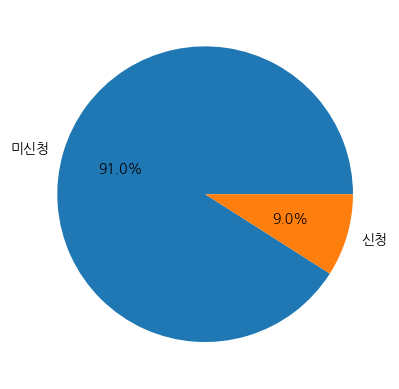

In [20]:
plt.pie(df_member2['배송서비스신청여부'].value_counts(), labels=df_member2['배송서비스신청여부'].value_counts().index, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x7922954a6b60>,
 [Text(-1.0670877092570354, 0.2670651994412089, '미수신'),
  Text(1.06708769675481, -0.26706524939519005, '수신')],
 [Text(-0.5820478414129284, 0.1456719269679321, '92.2%'),
  Text(0.5820478345935326, -0.14567195421555817, '7.8%')])

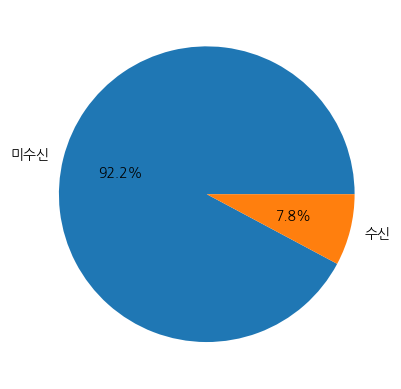

In [21]:
plt.pie(df_member2['모바일알람여부'].value_counts(), labels=df_member2['모바일알람여부'].value_counts().index, autopct='%.1f%%')

##### 배송서비스 신청여부

In [22]:
# 평균계산
p1 = df_member2.pivot_table(index = '배송서비스신청여부',
                            values=['총구매횟수','총구매금액','1회평균구매금액','1회평균구매수량'], aggfunc='mean').reset_index()
p1

,배송서비스신청여부,1회평균구매금액,1회평균구매수량,총구매금액,총구매횟수
0,미신청,20666.396832,1.738551,248348.022736,11.752854
1,신청,28904.800497,2.348343,617950.151486,23.008629


In [23]:
p_col = ['총구매횟수','총구매금액','1회평균구매금액','1회평균구매수량']

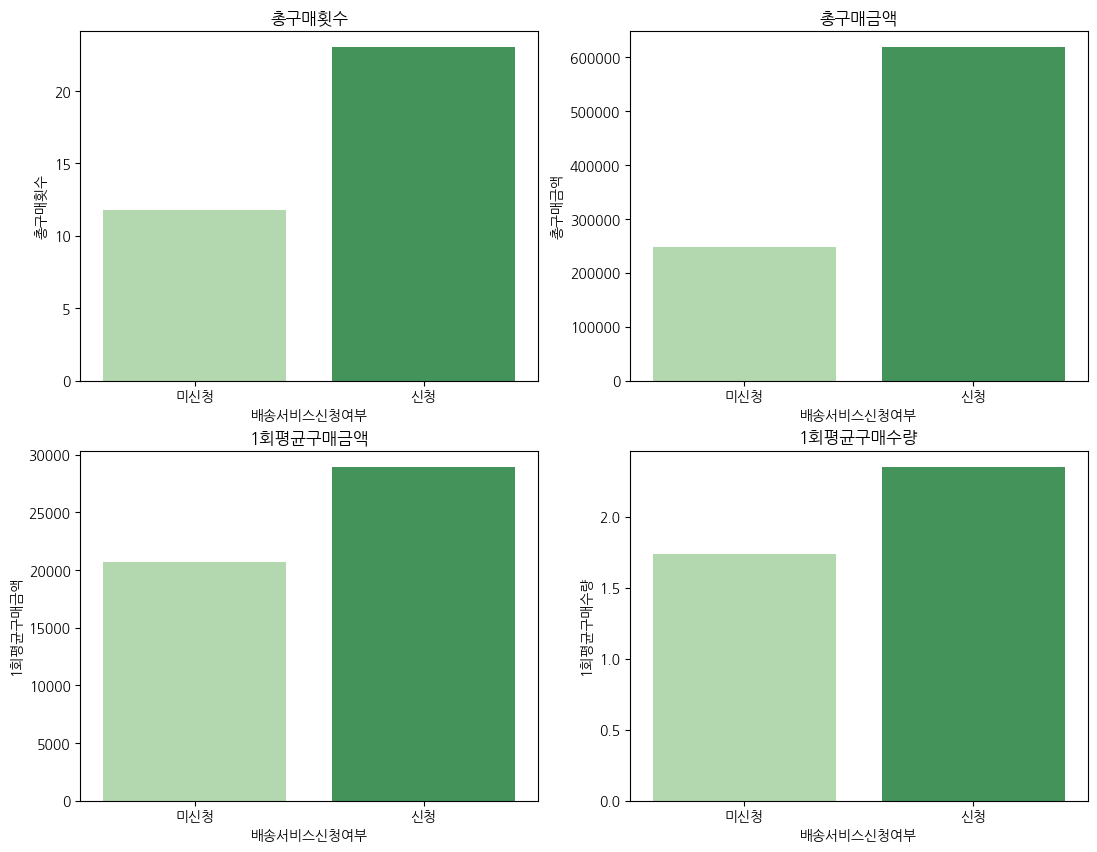

In [24]:
plt.figure(figsize=(13,10))
for index,i in enumerate(p_col):
  plt.subplot(2,2,index+1)
  sns.barplot(data = p1, x = '배송서비스신청여부', y = i, palette='Greens')
  plt.title(i)
plt.show()

In [25]:
# 합으로 계산
p1 = df_member2.pivot_table(index = '배송서비스신청여부',
                            values=['총구매횟수','총구매금액','1회평균구매금액','1회평균구매수량'], aggfunc='median').reset_index()
p1

,배송서비스신청여부,1회평균구매금액,1회평균구매수량,총구매금액,총구매횟수
0,미신청,16218.163636,1.555556,76529,4
1,신청,25891.714286,2.200000,572063,23


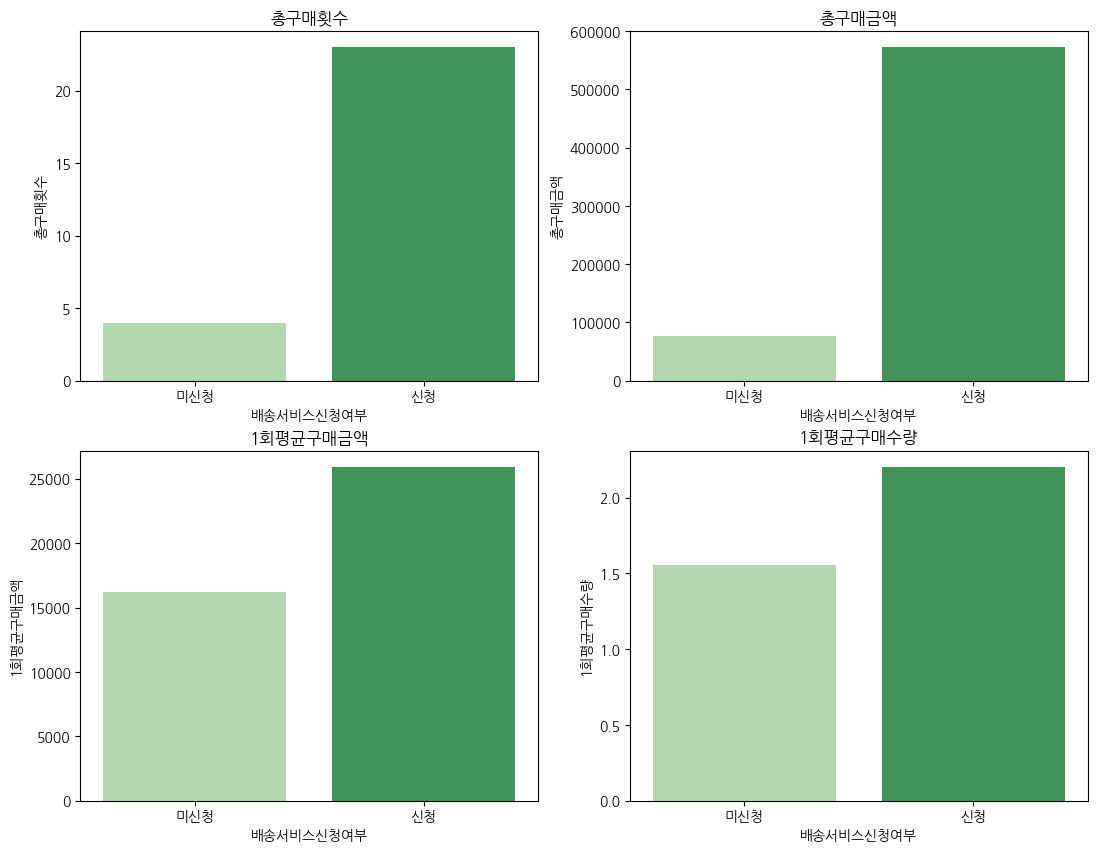

In [26]:
plt.figure(figsize=(13,10))
for index,i in enumerate(p_col):
  plt.subplot(2,2,index+1)
  sns.barplot(data = p1, x = '배송서비스신청여부', y = i, palette='Greens')
  plt.title(i)
plt.show()

##### 모바일 알람여부

In [27]:
# 평균계산
p2 = df_member2.pivot_table(index = '모바일알람여부', values=['총구매횟수','총구매금액','1회평균구매금액','1회평균구매수량'], aggfunc='median').reset_index()
p2

,모바일알람여부,1회평균구매금액,1회평균구매수량,총구매금액,총구매횟수
0,미수신,17193.791667,1.619048,89594,5
1,수신,17850.314815,1.770330,540173,42


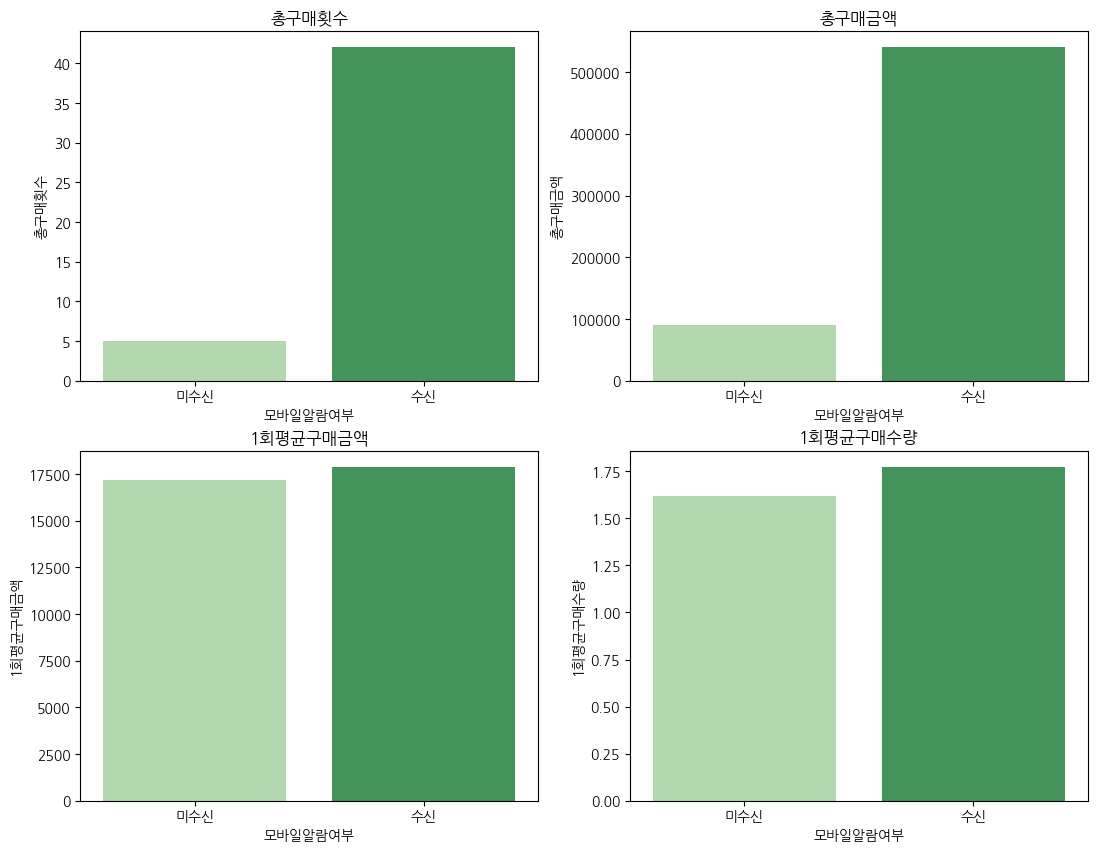

In [28]:
plt.figure(figsize=(13,10))
for index,i in enumerate(p_col):
  plt.subplot(2,2,index+1)
  sns.barplot(data = p2, x = '모바일알람여부', y = i, palette='Greens')
  plt.title(i)
plt.show()

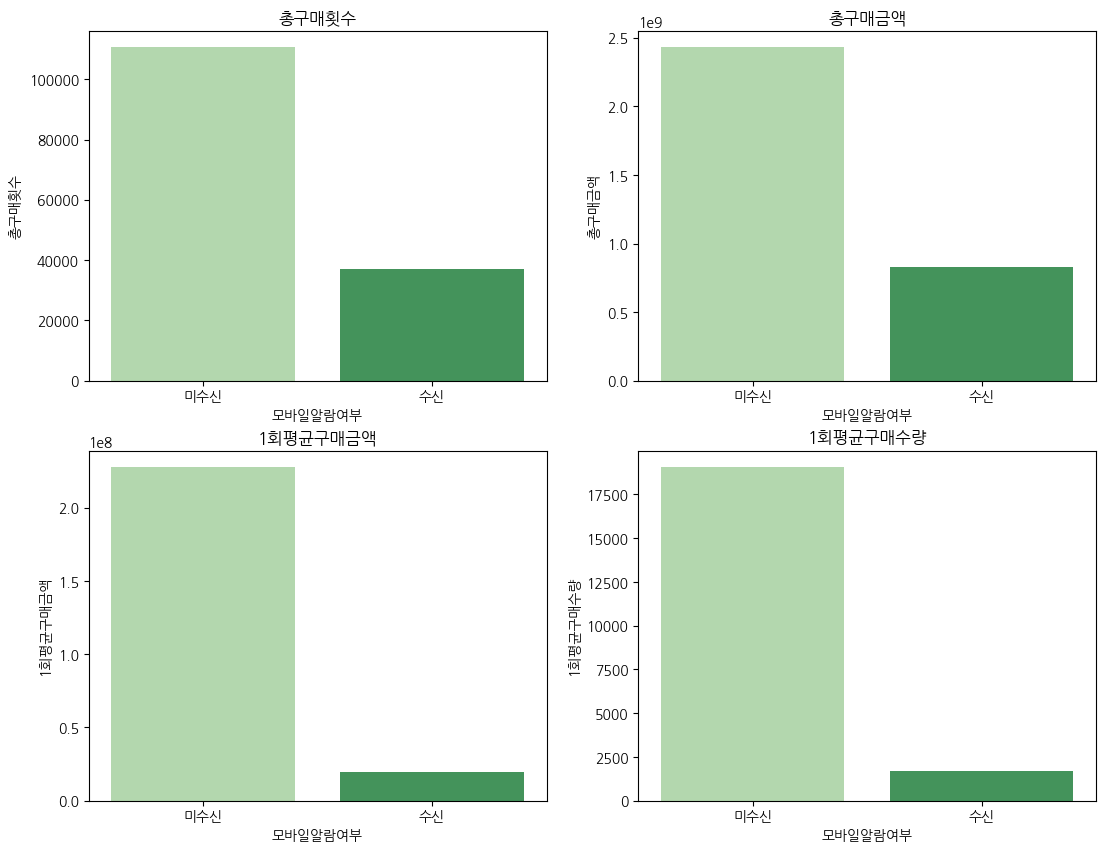

In [29]:
# 합으로 계산
p2 = df_member2.pivot_table(index = '모바일알람여부', values=['총구매횟수','총구매금액','1회평균구매금액','1회평균구매수량'], aggfunc='sum').reset_index()
plt.figure(figsize=(13,10))
for index,i in enumerate(p_col):
  plt.subplot(2,2,index+1)
  sns.barplot(data = p2, x = '모바일알람여부', y = i, palette='Greens')
  plt.title(i)
plt.show()

# 회원서비스 고객과 아닌 고객의 월별 구매금액 차이

##### 모바일알람

In [30]:
cond1 = df_member2['모바일알람여부'] == '수신'
cond2 = df_member2['배송서비스신청여부'] == '신청'
df_member2[cond1]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량
35,1004617536,정상회원,수지구-죽전동,여,41.0,미신청,수신,normal,1,27951,27951.000000,2.000000
50,1005669888,정상회원,수지구-상현동,여,63.0,미신청,수신,normal,2,57433,28716.500000,1.000000
81,1007817280,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,normal,60,1501914,25031.900000,2.650000
82,1007820992,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,normal,54,804440,14897.037037,1.685185
92,1008511424,정상회원,수지구-동천동,여,46.0,미신청,수신,normal,12,217477,18123.083333,2.083333
...,...,...,...,...,...,...,...,...,...,...,...,...
11490,993938112,정상회원,수지구-신봉동,여,47.0,미신청,수신,VIP,118,4799085,40670.211864,3.169492
11492,994348288,정상회원,수지구-풍덕천동,여,32.0,미신청,수신,VIP,138,2260752,16382.260870,2.101449
11512,99763712,정상회원,수지구-신봉동,여,48.0,미신청,수신,VIP,88,1752355,19913.125000,1.886364
11532,999068096,정상회원,기흥구-신갈동,여,43.0,미신청,수신,normal,1,3733,3733.000000,1.000000


In [31]:
df['공급일자2'] = pd.to_datetime(df['공급일자'])
df['월'] = df['공급일자2'].dt.month

In [32]:
alam_yes = df[df['회원번호'].isin(df_member.loc[cond1]['회원번호'])]
alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()

,월,구매금액
0,1,84610224
1,2,79139040
2,3,80578206
3,4,78261886
4,5,82866844
5,6,81739076
6,7,96505586
7,8,87730171
8,9,82113941
9,10,72457997


In [33]:
month_list = alam_yes['월'].value_counts().index.sort_values()

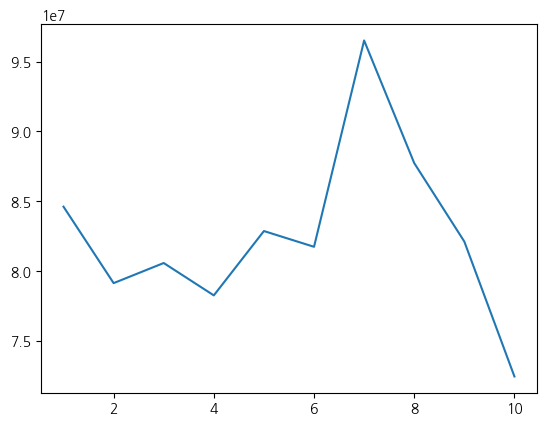

In [34]:
plt.plot(alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['월'],alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['구매금액'])

In [35]:
alam_yes = df[df['회원번호'].isin(df_member.loc[cond1]['회원번호'])]
alam_yes.pivot_table(index = '월', values = 'label', aggfunc='sum').reset_index()

,월,label
0,1,7948
1,2,6613
2,3,7609
3,4,7484
4,5,7844
5,6,8233
6,7,8869
7,8,8126
8,9,7208
9,10,6851


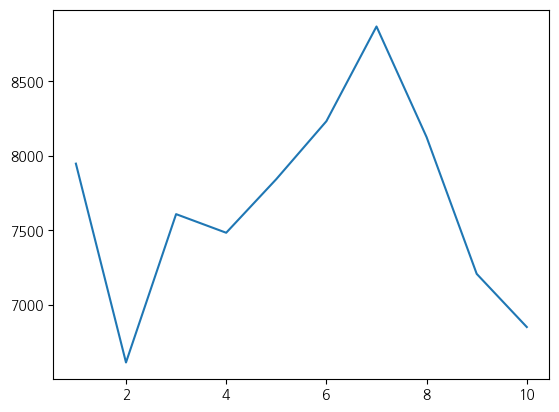

In [36]:
plt.plot(alam_yes.pivot_table(index = '월', values = 'label', aggfunc='sum').reset_index()['월'],alam_yes.pivot_table(index = '월', values = 'label', aggfunc='sum').reset_index()['label'])

In [37]:
alam_yes = df[df['회원번호'].isin(df_member.loc[cond1]['회원번호'])]
alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='median').reset_index()

,월,구매금액
0,1,7275
1,2,7466
2,3,7179
3,4,7275
4,5,7275
5,6,7083
6,7,7083
7,8,7275
8,9,7849
9,10,7466


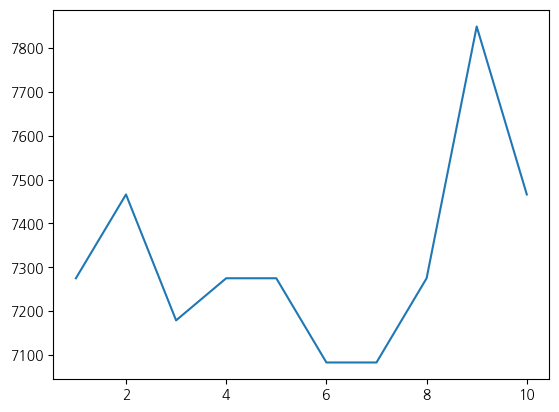

In [38]:
plt.plot(alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='median').reset_index()['월'],alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='median').reset_index()['구매금액'])

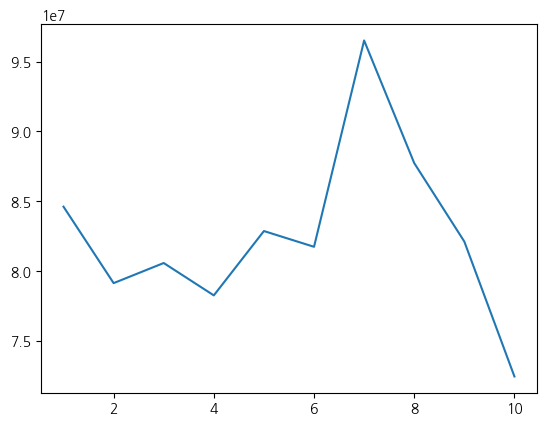

In [39]:
plt.plot(alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['월'],alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['구매금액'])

In [40]:
alam_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()
for i in month_list:
  df_nyang = alam_yes[alam_yes['월'] == i]
  print(st.normaltest(df_nyang['구매금액']))

NormaltestResult(statistic=16029.91563031541, pvalue=0.0)
NormaltestResult(statistic=9729.845682034034, pvalue=0.0)
NormaltestResult(statistic=9697.534639334817, pvalue=0.0)
NormaltestResult(statistic=7155.138579210781, pvalue=0.0)
NormaltestResult(statistic=6314.125855484504, pvalue=0.0)
NormaltestResult(statistic=4728.780063758241, pvalue=0.0)
NormaltestResult(statistic=26569.148540838258, pvalue=0.0)
NormaltestResult(statistic=8736.880188116438, pvalue=0.0)
NormaltestResult(statistic=6909.168788268256, pvalue=0.0)
NormaltestResult(statistic=12132.811211930999, pvalue=0.0)


In [41]:
for i in month_list:
  df_nyang = alam_yes[alam_yes['월'] == i]
  for j in month_list:
    if i != j:
      df_nyong = alam_yes[alam_yes['월'] == j]
      if st.ranksums(df_nyang['구매금액'], df_nyong['구매금액'])[1] < 0.05:
        print(f'{i}와 {j}의 중앙값은 다르다')
        print(st.ranksums(df_nyang['구매금액'], df_nyong['구매금액']))


1와 2의 중앙값은 다르다
RanksumsResult(statistic=-4.211014714408301, pvalue=2.542261848688521e-05)
1와 4의 중앙값은 다르다
RanksumsResult(statistic=2.084620193563803, pvalue=0.03710378999587076)
1와 5의 중앙값은 다르다
RanksumsResult(statistic=3.2270536892024455, pvalue=0.0012507198977443497)
1와 6의 중앙값은 다르다
RanksumsResult(statistic=6.636780914445841, pvalue=3.2060762292158245e-11)
1와 7의 중앙값은 다르다
RanksumsResult(statistic=3.6632775931195343, pvalue=0.0002490084292456231)
1와 8의 중앙값은 다르다
RanksumsResult(statistic=2.007347041478315, pvalue=0.044712723528512674)
2와 1의 중앙값은 다르다
RanksumsResult(statistic=4.211014714408301, pvalue=2.542261848688521e-05)
2와 3의 중앙값은 다르다
RanksumsResult(statistic=5.233755727689329, pvalue=1.6609993236068598e-07)
2와 4의 중앙값은 다르다
RanksumsResult(statistic=6.0654264508226285, pvalue=1.316039853998252e-09)
2와 5의 중앙값은 다르다
RanksumsResult(statistic=7.029547056996198, pvalue=2.0720506474022593e-12)
2와 6의 중앙값은 다르다
RanksumsResult(statistic=10.209808587416711, pvalue=1.7921803372276454e-24)
2와 7의 중앙값은 다르다


In [42]:
alam_no = df[df['회원번호'].isin(df_member.loc[~cond1]['회원번호'])]
alam_no.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()

,월,구매금액
0,1,256244486
1,2,256378615
2,3,238123060
3,4,229039081
4,5,236832699
5,6,225733621
6,7,263305833
7,8,246220461
8,9,254756105
9,10,222519491


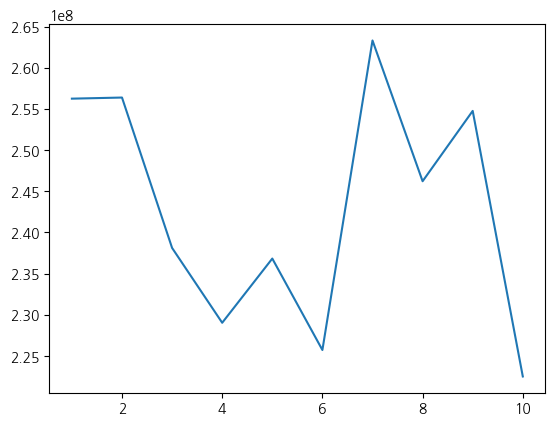

In [43]:
plt.plot(alam_no.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['월'],alam_no.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['구매금액'])

In [44]:
df.pivot_table(index = '월', values = 'label', aggfunc='sum').reset_index()

,월,label
0,1,31411
1,2,27498
2,3,29711
3,4,29131
4,5,29532
5,6,29566
6,7,32172
7,8,30813
8,9,27971
9,10,26840


In [45]:
# plt.plot(alam_no.pivot_table(index = '월', values = 'label', aggfunc='sum').reset_index()['월'],alam_no.pivot_table(index = '월', values = 'label', aggfunc='sum').reset_index()['구매금액'])

##### 배송서비스

In [46]:
deli_yes = df[df['회원번호'].isin(df_member.loc[cond2]['회원번호'])]
deli_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()

,월,구매금액
0,1,68472853
1,2,66593224
2,3,64214516
3,4,61437864
4,5,62105758
5,6,60070792
6,7,72636407
7,8,65938045
8,9,66621825
9,10,56430724


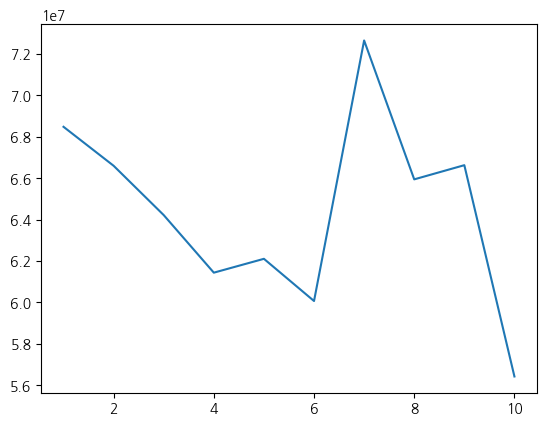

In [47]:
plt.plot(deli_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['월'],deli_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['구매금액'])

In [48]:
deli_no = df[df['회원번호'].isin(df_member.loc[~cond2]['회원번호'])]
deli_no.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()

,월,구매금액
0,1,272381857
1,2,268924431
2,3,254486750
3,4,245863103
4,5,257593785
5,6,247401905
6,7,287175012
7,8,268012587
8,9,270248221
9,10,238546764


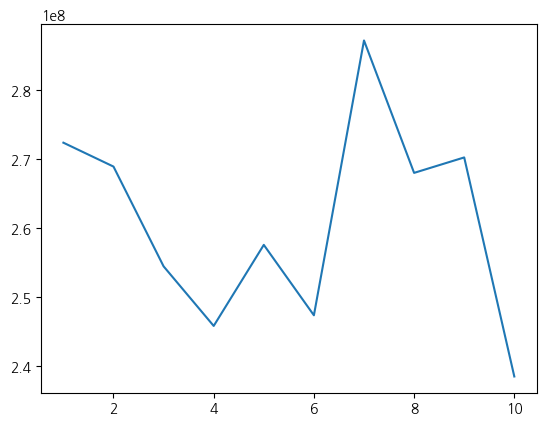

In [49]:
plt.plot(deli_no.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['월'],deli_no.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['구매금액'])

In [50]:
df.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()

,월,구매금액
0,1,340854710
1,2,335517655
2,3,318701266
3,4,307300967
4,5,319699543
5,6,307472697
6,7,359811419
7,8,333950632
8,9,336870046
9,10,294977488


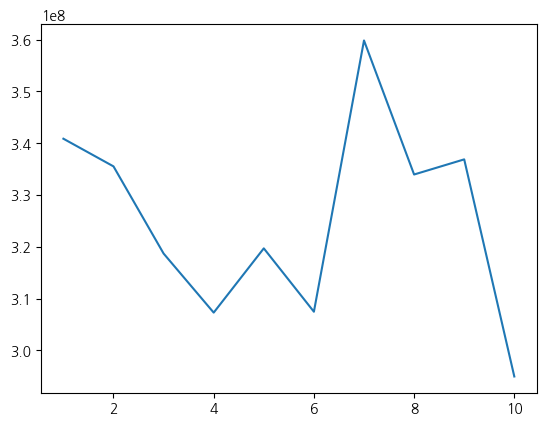

In [51]:
plt.plot(df.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['월'],df.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()['구매금액'])

# 연령대, 월별 최빈값

In [52]:
def age_classify(x):
    if pd.isnull(x):
        return x
    elif x >= 100:
        return '90대'
    else:
        return str(x)[0] + '0대'

df_member2['연령대'] = df_member2['연령'].apply(age_classify)
df_member2['연령대'].value_counts()

연령대
40대    4480
50대    2546
30대    2137
60대    1455
70대     736
80대     136
20대      52
90대      10
10대       1
Name: count, dtype: int64

In [53]:
df_member2[df_member2['모바일알람여부'] =='수신']['연령대'].value_counts()/df_member2['연령대'].value_counts()

연령대
10대         NaN
20대         NaN
30대    0.078147
40대    0.090848
50대    0.098193
60대    0.035739
70대    0.027174
80대    0.036765
90대    0.100000
Name: count, dtype: float64

In [54]:
for i in df_member2['연령대'].unique():
  cond1 = df_member2['연령대'] == i
  mem_id = df_member2[cond1]['회원번호']
  cond2 = df['회원번호'].isin(mem_id)
  df_temp = df[cond2]
  print(i)
  print(df_temp.물품중분류.value_counts().index[:3])
  print(df_temp.물품소분류.value_counts().index[:10])

50대
Index(['두부/유부', '잎/줄기채소', '알'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '스낵', '콩나물', '우유/산양유', '양파', '오이', '김가공', '돼지(중량)', '멥쌀'], dtype='object', name='물품소분류')
30대
Index(['과자', '음료', '두부/유부'], dtype='object', name='물품중분류')
Index(['스낵', '두부', '유정란', '과즙', '우유/산양유', '김가공', '콩나물', '양파', '푸딩',
       '식빵, 식사대용'],
      dtype='object', name='물품소분류')
70대
Index(['잎/줄기채소', '두부/유부', '알'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '콩나물', '스낵', '오이', '논지엠오유정란', '우유/산양유', '양파', '멥쌀', '당근'], dtype='object', name='물품소분류')
40대
Index(['두부/유부', '알', '잎/줄기채소'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '스낵', '우유/산양유', '콩나물', '김가공', '과즙', '양파', '식빵, 식사대용',
       '가래떡'],
      dtype='object', name='물품소분류')
60대
Index(['잎/줄기채소', '두부/유부', '알'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '스낵', '콩나물', '우유/산양유', '오이', '멥쌀', '양파', '김가공', '논지엠오유정란'], dtype='object', name='물품소분류')
80대
Index(['두부/유부', '잎/줄기채소', '알'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '멥쌀', '우유/

In [55]:
for i in df['월'].unique():
  cond1 = df['월'] == i
  df_temp = df[cond1]
  print(i)
  print(df_temp.물품중분류.value_counts().index[:3])
  print(df_temp.물품소분류.value_counts().index[:10])

1
Index(['두부/유부', '알', '잎/줄기채소'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '스낵', '콩나물', '우유/산양유', '김가공', '대파', '양파', '가래떡', '시금치'], dtype='object', name='물품소분류')
2
Index(['두부/유부', '알', '잎/줄기채소'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '스낵', '콩나물', '대파', '우유/산양유', '가래떡', '양파', '김가공', '시금치'], dtype='object', name='물품소분류')
3
Index(['잎/줄기채소', '두부/유부', '알'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '스낵', '콩나물', '우유/산양유', '김가공', '양파', '과즙', '대파', '딸기'], dtype='object', name='물품소분류')
4
Index(['잎/줄기채소', '두부/유부', '알'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '스낵', '우유/산양유', '콩나물', '과즙', '양파', '당근', '김가공', '미역/다시마'], dtype='object', name='물품소분류')
5
Index(['잎/줄기채소', '두부/유부', '과자'], dtype='object', name='물품중분류')
Index(['두부', '스낵', '유정란', '오이', '우유/산양유', '콩나물', '양파', '과즙', '당근', '중파'], dtype='object', name='물품소분류')
6
Index(['두부/유부', '잎/줄기채소', '열매채소'], dtype='object', name='물품중분류')
Index(['두부', '유정란', '스낵', '오이', '우유/산양유', '콩나물', '애호박', '김가공', '과즙', '중파'], dtyp

# 연령대별 구매차이

In [56]:
p1 = df_member2.pivot_table(index = '연령대' , values= ['총구매횟수',	'총구매금액',	'1회평균구매금액',	'1회평균구매수량'], aggfunc='sum').reset_index()

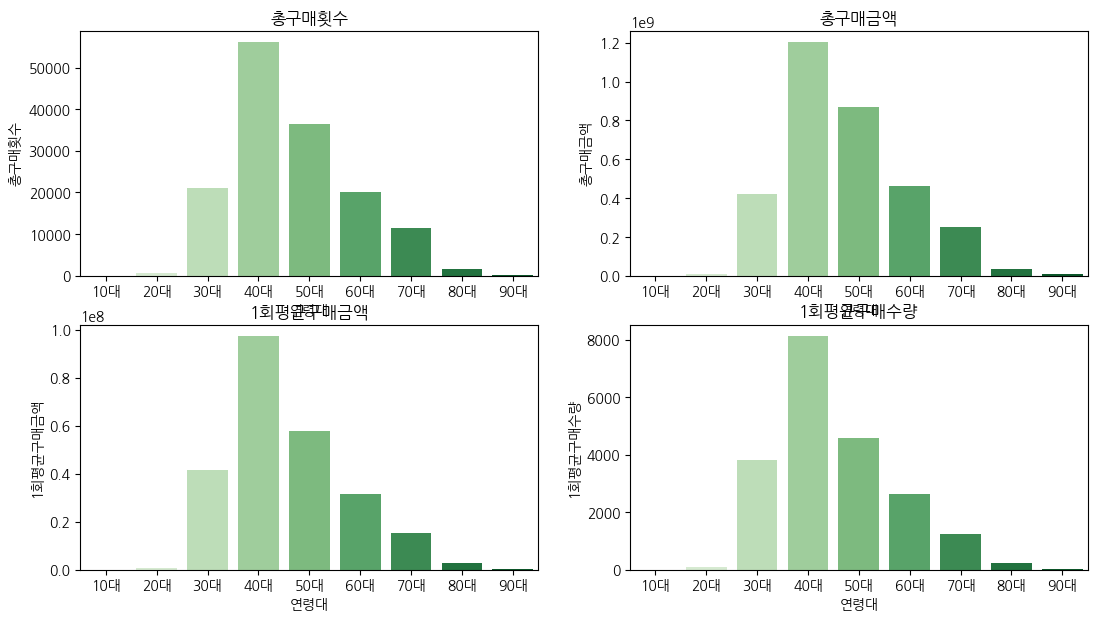

In [57]:
plt.figure(figsize=(13,7))
for index,i in enumerate(p_col):
  plt.subplot(2,2,index+1)
  sns.barplot(data = p1, x = '연령대', y = i, palette='Greens')
  plt.title(i)
plt.show()

# 연령대별 회원서비스 신청상황

In [58]:
p1 = df_member2[df_member2['모바일알람여부'] =='수신'].pivot_table(index = '연령대' , values= ['모바일알람여부'], aggfunc='count').reset_index()

In [59]:
df_member2['label'] = 1
p2 = df_member2.pivot_table(index='연령대',values='label', aggfunc='sum')

In [60]:
df_member2[df_member2['배송서비스신청여부'] =='신청'].pivot_table(index = '연령대' , values= ['배송서비스신청여부'], aggfunc='count')

,배송서비스신청여부
연령대,
20대,6
30대,131
40대,398
50대,261
60대,164
70대,72
80대,11


# 월별 매출

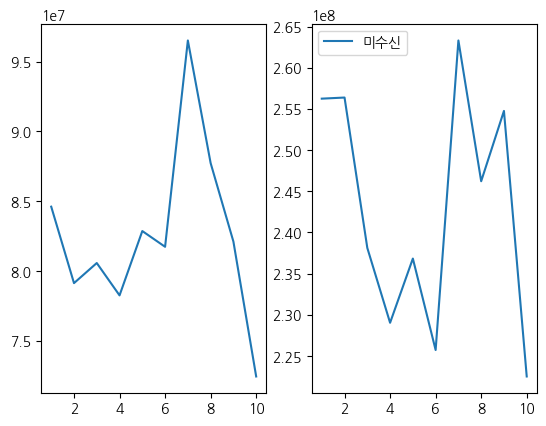

In [61]:
cond1 = df_member2['모바일알람여부'] == '수신'
df_list = df_member2[cond1]['회원번호']
df_list2 = df_member2[~cond1]['회원번호']
df_mobile_yes = df[df['회원번호'].isin(df_list)]
df_mobile_no = df[df['회원번호'].isin(df_list2)]
p1 = df_mobile_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()
p2 = df_mobile_no.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()
plt.subplot(1,2,1)
plt.plot(p1['월'],p1['구매금액'],label='수신')
plt.subplot(1,2,2)
plt.plot(p2['월'],p2['구매금액'],label='미수신')
plt.legend()
plt.show()



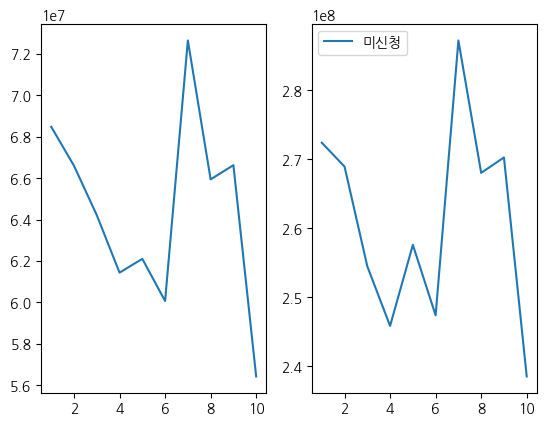

In [62]:
cond1 = df_member2['배송서비스신청여부'] == '신청'
df_list = df_member2[cond1]['회원번호']
df_list2 = df_member2[~cond1]['회원번호']
df_mobile_yes = df[df['회원번호'].isin(df_list)]
df_mobile_no = df[df['회원번호'].isin(df_list2)]
p1 = df_mobile_yes.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()
p2 = df_mobile_no.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()
plt.subplot(1,2,1)
plt.plot(p1['월'],p1['구매금액'],label='신청')
plt.subplot(1,2,2)
plt.plot(p2['월'],p2['구매금액'],label='미신청')
plt.legend()
plt.show()

# 연령대별 월별 구매횟수, 금액

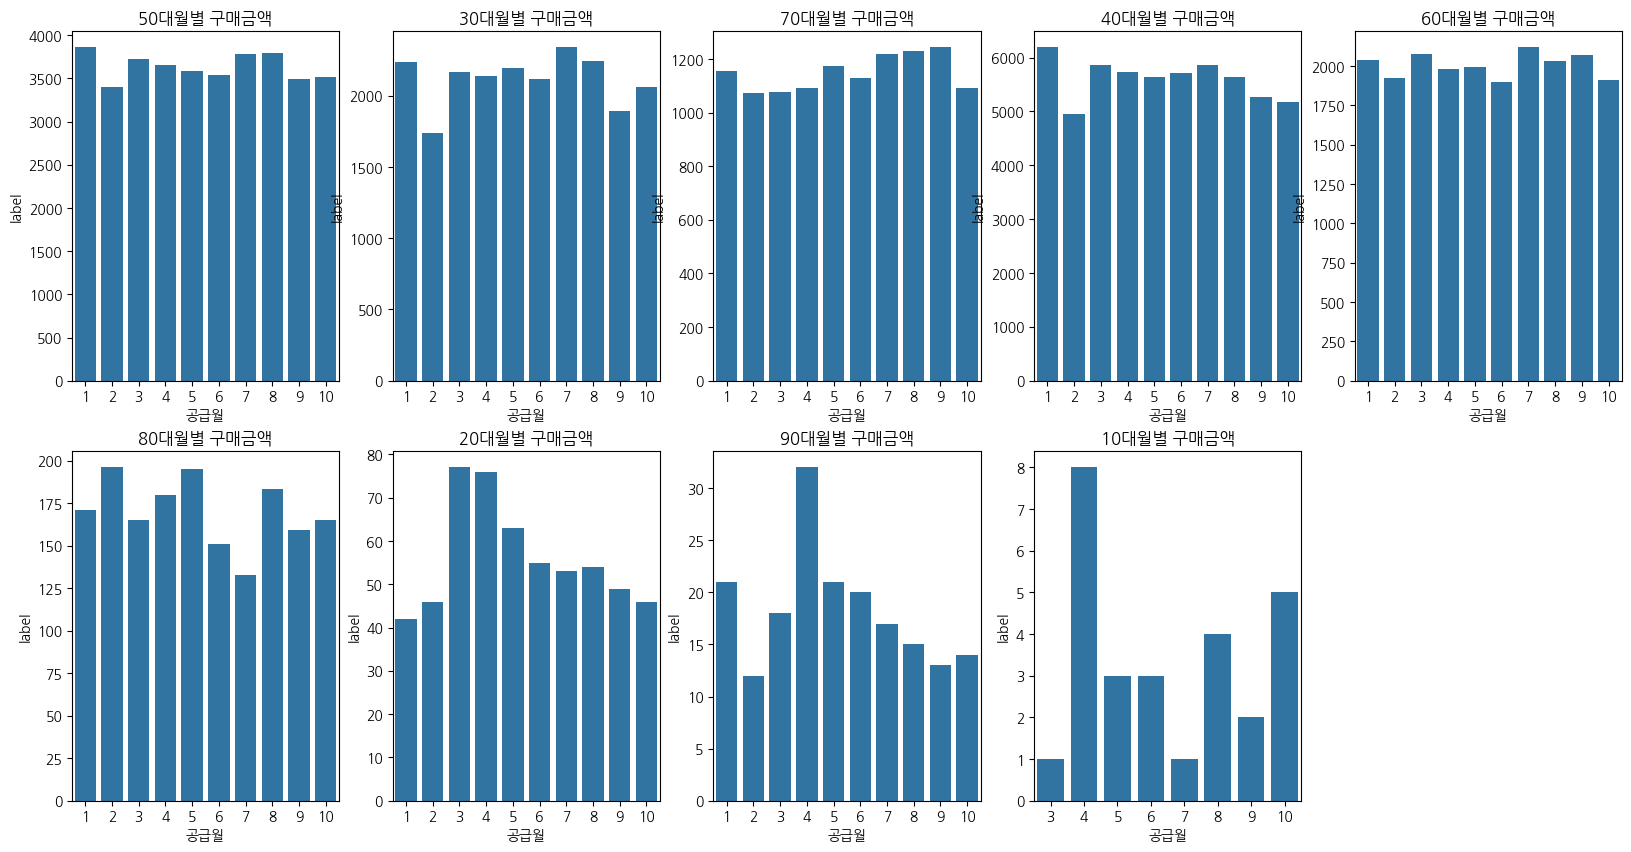

In [63]:
plt.figure(figsize=(20,10))
for idx,i in enumerate(df_member2['연령대'].unique()[:-1]):
  cond1 = df_member2['연령대'] == i
  mem_id = df_member2[cond1]['회원번호']
  cond2 = df['회원번호'].isin(mem_id)
  df_temp = df[cond2]
  p1 = df_temp.pivot_table(index = ['회원번호','공급일자'], values = 'label', aggfunc='min').reset_index()
  p1['공급월'] = pd.to_datetime(p1['공급일자']).dt.month
  p2 = p1.pivot_table(index = ['회원번호','공급월'], values = 'label', aggfunc='sum').reset_index()
  p3 = p2.pivot_table(index = '공급월', values = 'label', aggfunc='sum').reset_index()
  plt.subplot(2,5,idx+1)
  sns.barplot(p3,x='공급월',y = 'label')
  plt.title(i+'월별 구매금액')

plt.show()

In [64]:
p1 = df_temp.pivot_table(index = ['회원번호','공급일자'], values = 'label', aggfunc='min').reset_index()
p1['공급월'] = pd.to_datetime(p1['공급일자']).dt.month
p2 = p1.pivot_table(index = ['회원번호','공급월'], values = 'label', aggfunc='sum').reset_index()

In [65]:
m1 = pd.merge(df,df_member2[['회원번호','연령대']], on='회원번호', how = 'left')
m1['월'] = m1['월'].astype(int)

In [66]:
p_x = m1.pivot_table(index=['회원번호','공급일자'], values=['label','월'],aggfunc='min').reset_index()
p_x2 = p_x.pivot_table(index=['회원번호','월'], values=['label'],aggfunc='sum').reset_index()

In [67]:
m2 = pd.merge(p_x2,df_member2[['연령대','회원번호']], on='회원번호', how = 'left')

In [68]:
p3 = m2.pivot_table(index = ['연령대','월'], values = 'label', aggfunc='sum').reset_index()

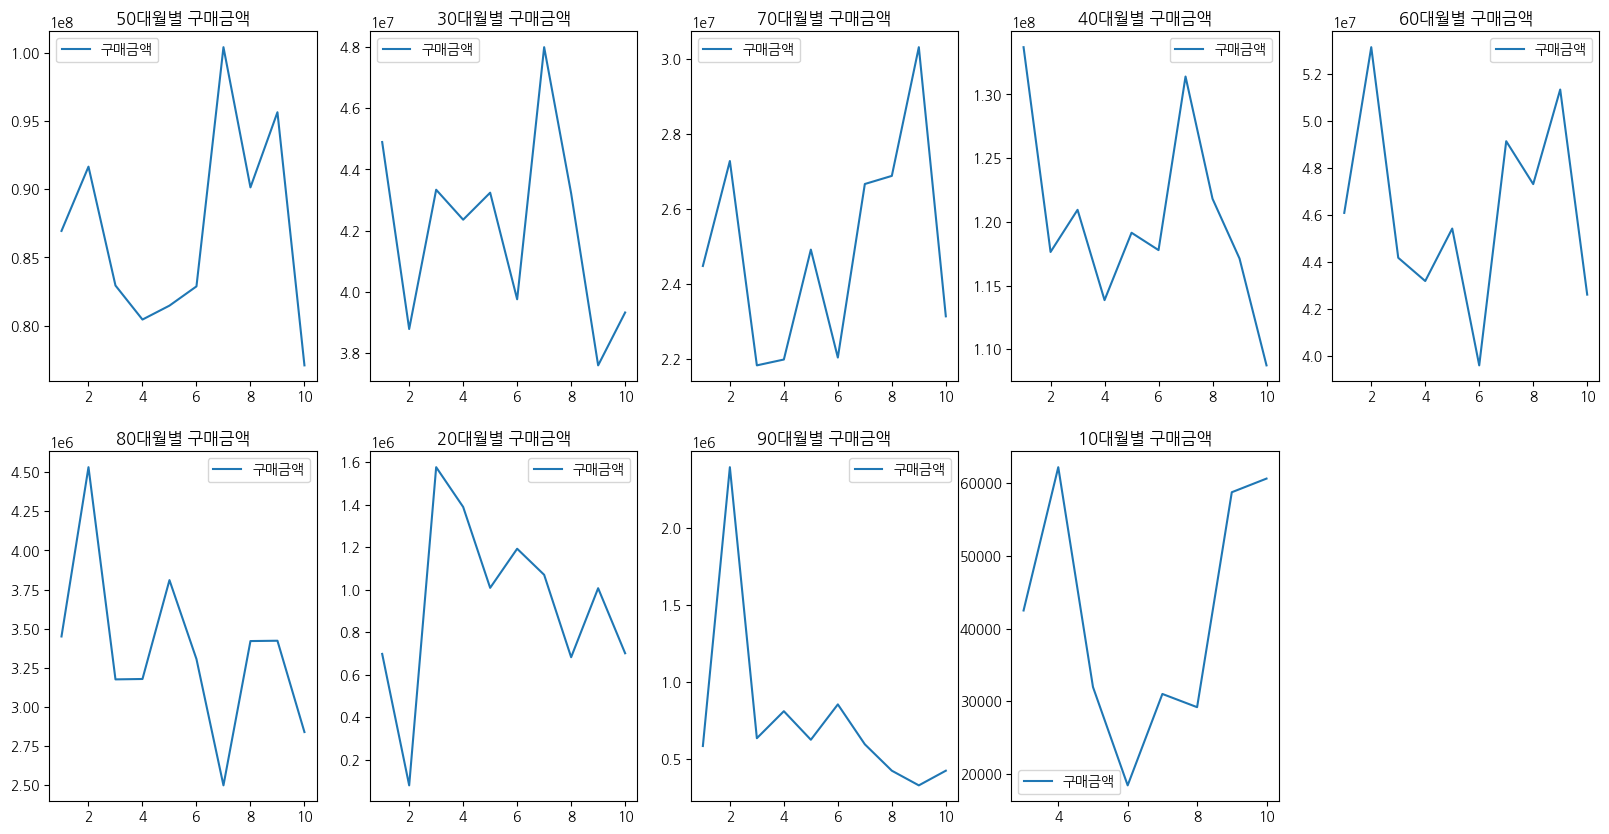

In [69]:
plt.figure(figsize=(20,10))
for idx,i in enumerate(df_member2['연령대'].unique()[:-1]):
  cond1 = df_member2['연령대'] == i
  mem_id = df_member2[cond1]['회원번호']
  cond2 = df['회원번호'].isin(mem_id)
  df_temp = df[cond2]
  p1 = df_temp.pivot_table(index = '월', values = '구매금액', aggfunc='sum').reset_index()
  plt.subplot(2,5,idx+1)
  plt.plot(p1['월'],p1['구매금액'], label = '구매금액')
  plt.title(i+'월별 구매금액')
  plt.legend()

plt.show()

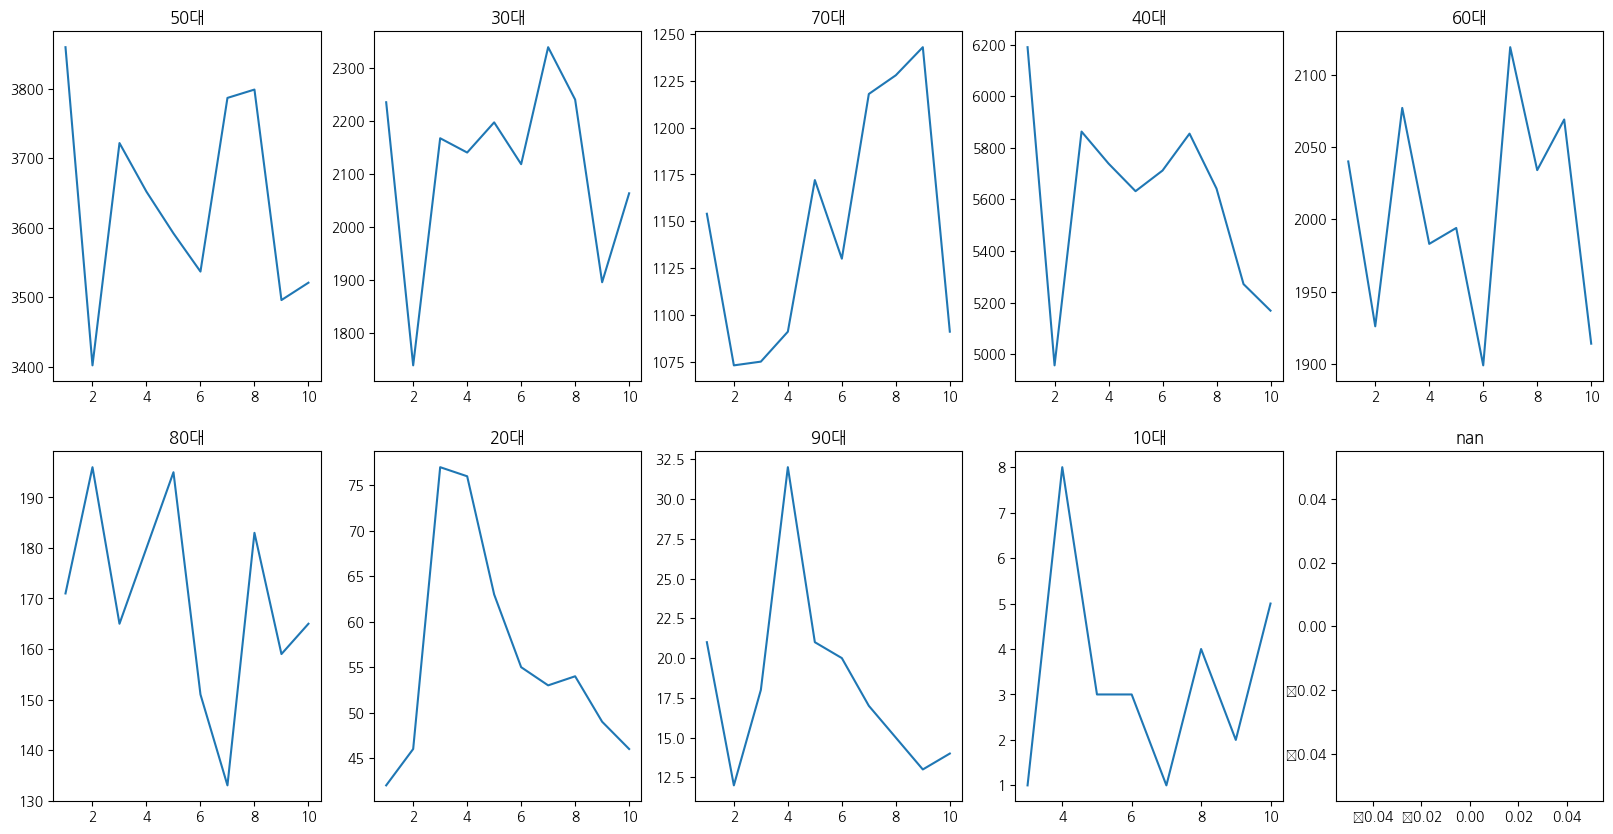

In [70]:
plt.figure(figsize=(20,10))
for idx,i in enumerate(df_member2['연령대'].unique()):
  plt.subplot(2,5,idx+1)
  plt.plot(p3[p3['연령대'] == i]['월'],p3[p3['연령대'] == i]['label'])
  plt.title(i)
plt.show()

# RFM을 기준으로 고객 등급과 회원서비스 간의 상관관계

In [71]:
df

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,label,공급일자2,월
0,2022-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,1,2022-01-01,1
1,2022-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,1,2022-01-01,1
2,2022-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,1,2022-01-01,1
3,2022-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,1,2022-01-01,1
4,2022-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,1,2022-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2022-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26,1,2022-10-30,10
294641,2022-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58,1,2022-10-30,10
294642,2022-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36,1,2022-10-30,10
294643,2022-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23,1,2022-10-30,10


In [72]:
## 코호트 분석
# 고객별 첫 구매일을 찾아 새로운 컬럼에 저장
df['첫구매 일'] = df.groupby('회원번호')['공급일자'].transform('min')
df['첫구매 일'] = pd.to_datetime(df['첫구매 일'])
# 첫 구매일과 공급일자의 차이를 일자로 계산
df['일수 차이'] = (df['공급일자2'] - df['첫구매 일']).dt.days

# 첫 구매일을 기준으로 월 단위 코호트 생성
df['첫구매 월'] = df['첫구매 일'].dt.to_period('M')

def get_period(days):
    for period in [1]+list(range(30, 301, 30)):
        if days <= period:
            return f'{period-30}~{period}일'
    else:
        return f'{period} 초과'

df['기간'] = df['일수 차이'].apply(get_period)

# 코호트와 기간 별로 고객 수를 계산
cohort_group = df.groupby(['첫구매 월', '기간'])
cohort_data = cohort_group['회원번호'].nunique().unstack(0)

# 코호트 별 초기 고객 수를 계산
cohort_sizes = df.groupby('첫구매 월')['회원번호'].nunique()

# 유지율 계산
retention_matrix = cohort_data.divide(cohort_sizes, axis=1).sort_index(key=lambda x: [int(x2.split('~')[0][:4]) for x2 in x])

# 결과 출력
display(retention_matrix.iloc[1:].T)

기간,0~30일,30~60일,60~90일,90~120일,120~150일,150~180일,180~210일,210~240일,240~270일,270~300일,300 초과
첫구매 월,,,,,,,,,,,
2022-01,0.703237,0.704137,0.690108,0.676978,0.652158,0.653417,0.633273,0.644964,0.629137,0.544964,0.035432
2022-02,0.376939,0.370196,0.366150,0.392448,0.374241,0.359407,0.368173,0.374916,0.271072,0.001349,NaN
2022-03,0.342376,0.323667,0.330215,0.317119,0.302152,0.276894,0.280636,0.203929,0.003742,NaN,NaN
2022-04,0.301370,0.309589,0.298630,0.247945,0.273973,0.246575,0.179452,0.001370,NaN,NaN,NaN
2022-05,0.313015,0.270181,0.228995,0.266886,0.179572,0.156507,NaN,NaN,NaN,NaN,NaN
2022-06,0.284553,0.231707,0.233740,0.243902,0.170732,NaN,NaN,NaN,NaN,NaN,NaN
2022-07,0.235165,0.208791,0.191209,0.092308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,0.260766,0.210526,0.107656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,0.281250,0.182292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
cond1 = df_member2['모바일알람여부'] == '수신'
cond2 = df_member2[cond1]['회원번호']
cond3 = df['회원번호'].isin(cond2)
df2 = df[cond3]

In [74]:
## 코호트 분석
# 고객별 첫 구매일을 찾아 새로운 컬럼에 저장
df2['첫구매 일'] = df2.groupby('회원번호')['공급일자'].transform('min')
df2['첫구매 일'] = pd.to_datetime(df2['첫구매 일'])
# 첫 구매일과 공급일자의 차이를 일자로 계산
df2['일수 차이'] = (df2['공급일자2'] - df2['첫구매 일']).dt.days

# 첫 구매일을 기준으로 월 단위 코호트 생성
df2['첫구매 월'] = df2['첫구매 일'].dt.to_period('M')

def get_period(days):
    for period in [1]+list(range(30, 301, 30)):
        if days <= period:
            return f'{period-30}~{period}일'
    else:
        return f'{period} 초과'

df2['기간'] = df2['일수 차이'].apply(get_period)

# 코호트와 기간 별로 고객 수를 계산
cohort_group = df2.groupby(['첫구매 월', '기간'])
cohort_data = cohort_group['회원번호'].nunique().unstack(0)

# 코호트 별 초기 고객 수를 계산
cohort_sizes = df2.groupby('첫구매 월')['회원번호'].nunique()

# 유지율 계산
retention_matrix = cohort_data.divide(cohort_sizes, axis=1).sort_index(key=lambda x: [int(x2.split('~')[0][:4]) for x2 in x])

# 결과 출력
display(retention_matrix.iloc[1:].T)

기간,0~30일,30~60일,60~90일,90~120일,120~150일,150~180일,180~210일,210~240일,240~270일,270~300일,300 초과
첫구매 월,,,,,,,,,,,
2022-01,0.986028,0.980040,0.980040,0.984032,0.988024,0.980040,0.986028,0.980040,0.98004,0.958084,0.179641
2022-02,0.533333,0.400000,0.533333,0.533333,0.333333,0.333333,0.400000,0.600000,0.20000,NaN,NaN
2022-03,0.268293,0.365854,0.292683,0.292683,0.243902,0.268293,0.414634,0.268293,NaN,NaN,NaN
2022-04,0.209302,0.279070,0.209302,0.069767,0.093023,0.162791,0.093023,NaN,NaN,NaN,NaN
2022-05,0.321429,0.250000,0.214286,0.285714,0.178571,0.214286,NaN,NaN,NaN,NaN,NaN
2022-06,0.300000,0.246154,0.276923,0.300000,0.176923,NaN,NaN,NaN,NaN,NaN,NaN
2022-07,0.320000,0.226667,0.186667,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,0.250000,0.187500,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,0.136364,0.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
cond1 = df_member2['모바일알람여부'] == '수신'
cond2 = df_member2[~cond1]['회원번호']
cond3 = df['회원번호'].isin(cond2)
df2 = df[cond3]

In [76]:
## 코호트 분석
# 고객별 첫 구매일을 찾아 새로운 컬럼에 저장
df2['첫구매 일'] = df2.groupby('회원번호')['공급일자'].transform('min')
df2['첫구매 일'] = pd.to_datetime(df2['첫구매 일'])
# 첫 구매일과 공급일자의 차이를 일자로 계산
df2['일수 차이'] = (df2['공급일자2'] - df2['첫구매 일']).dt.days

# 첫 구매일을 기준으로 월 단위 코호트 생성
df2['첫구매 월'] = df2['첫구매 일'].dt.to_period('M')

def get_period(days):
    for period in [1]+list(range(30, 301, 30)):
        if days <= period:
            return f'{period-30}~{period}일'
    else:
        return f'{period} 초과'

df2['기간'] = df2['일수 차이'].apply(get_period)

# 코호트와 기간 별로 고객 수를 계산
cohort_group = df2.groupby(['첫구매 월', '기간'])
cohort_data = cohort_group['회원번호'].nunique().unstack(0)

# 코호트 별 초기 고객 수를 계산
cohort_sizes = df2.groupby('첫구매 월')['회원번호'].nunique()

# 유지율 계산
retention_matrix = cohort_data.divide(cohort_sizes, axis=1).sort_index(key=lambda x: [int(x2.split('~')[0][:4]) for x2 in x])

# 결과 출력
display(retention_matrix.iloc[1:].T)

기간,0~30일,30~60일,60~90일,90~120일,120~150일,150~180일,180~210일,210~240일,240~270일,270~300일,300 초과
첫구매 월,,,,,,,,,,,
2022-01,0.675232,0.676814,0.661396,0.646570,0.618897,0.621071,0.598340,0.611781,0.594386,0.504052,0.02115
2022-02,0.375341,0.369891,0.364441,0.391008,0.374659,0.359673,0.367847,0.372616,0.271798,0.001362,NaN
2022-03,0.345331,0.321984,0.331712,0.318093,0.304475,0.277237,0.275292,0.201362,0.003891,NaN,NaN
2022-04,0.307132,0.311499,0.304221,0.259098,0.285298,0.251820,0.184862,0.001456,NaN,NaN,NaN
2022-05,0.312608,0.271157,0.229706,0.265976,0.179620,0.153713,NaN,NaN,NaN,NaN,NaN
2022-06,0.279006,0.226519,0.218232,0.223757,0.168508,NaN,NaN,NaN,NaN,NaN,NaN
2022-07,0.218421,0.205263,0.192105,0.094737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,0.261194,0.211443,0.106965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,0.290055,0.176796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
import pandas as pd

# Load the data from the file


# Convert the '공급일자' column to datetime
df['공급일자'] = pd.to_datetime(df['공급일자'])

# Initialize a list to store the 3-month revisit rates
three_month_revisit_rates = []

# Loop through each month to calculate the 3-month revisit rate
for month in range(1, 13):
    # Filter data for the specific month
    monthly_data = df[df['공급일자'].dt.month == month]

    # Get the unique users who visited in the month
    first_visitors_monthly = monthly_data.groupby('회원번호')['공급일자'].min().reset_index()

    # Calculate the end date for the 3-month period
    end_date = first_visitors_monthly['공급일자'] + pd.DateOffset(months=3)

    # Filter the data to include only visits within 3 months of the first visit
    three_month_data = df[(df['공급일자'] >= first_visitors_monthly['공급일자'].min()) &
                            (df['공급일자'] <= end_date.max())]

    # Identify the revisitors by checking if they visited more than once in the 3-month period
    revisitors_three_months = three_month_data.groupby('회원번호').filter(lambda x: len(x) > 1)['회원번호'].nunique()

    # Total first visitors in the month
    total_first_visitors_monthly = first_visitors_monthly['회원번호'].nunique()

    # Calculate revisit rate for the 3-month period
    if total_first_visitors_monthly > 0:
        revisit_rate_three_months = (revisitors_three_months / total_first_visitors_monthly) * 100
    else:
        revisit_rate_three_months = 0

    # Append the result to the list
    three_month_revisit_rates.append(revisit_rate_three_months)

# Create a DataFrame for better visualization
three_month_revisit_df = pd.DataFrame({
    'Month': range(1, 13),
    '3-Month Revisit Rate (%)': three_month_revisit_rates
})

# Display the DataFrame
print(three_month_revisit_df)

    Month  3-Month Revisit Rate (%)
0       1                132.284173
1       2                136.498964
2       3                131.330703
3       4                133.516887
4       5                132.955791
5       6                133.467964
6       7                132.050347
7       8                119.738056
8       9                102.596921
9      10                 74.794316
10     11                  0.000000
11     12                  0.000000


In [78]:
import pandas as pd

# Load the data from the file


# Convert the '공급일자' column to datetime
df['공급일자'] = pd.to_datetime(df['공급일자'])

# Initialize a list to store the 3-month revisit rates
three_month_revisit_rates = []

# Loop through each month to calculate the 3-month revisit rate
for month in range(1, 13):
    # Filter data for the specific month
    monthly_data = df[df['공급일자'].dt.month == month]

    # Get the unique users who visited in the month
    first_visitors_monthly = monthly_data.groupby('회원번호')['공급일자'].min().reset_index()

    # Calculate the end date for the 3-month period
    end_date = first_visitors_monthly['공급일자'] + pd.DateOffset(months=3)

    # Filter the data to include only visits within 3 months of the first visit
    three_month_data = df[(df['공급일자'] >= first_visitors_monthly['공급일자'].min()) &
                            (df['공급일자'] <= end_date.max())]

    # Identify the revisitors by checking if they visited more than once in the 3-month period
    revisitors_three_months = three_month_data.groupby('회원번호').filter(lambda x: len(x) > 1)['회원번호'].nunique()

    # Total first visitors in the month
    total_first_visitors_monthly = first_visitors_monthly['회원번호'].nunique()

    # Calculate revisit rate for the 3-month period
    if total_first_visitors_monthly > 0:
        revisit_rate_three_months = (revisitors_three_months / total_first_visitors_monthly) * 100
    else:
        revisit_rate_three_months = 0

    # Append the result to the list
    three_month_revisit_rates.append(revisit_rate_three_months)

# Create a DataFrame for better visualization
three_month_revisit_df = pd.DataFrame({
    'Month': range(1, 13),
    '3-Month Revisit Rate (%)': three_month_revisit_rates
})

# Display the DataFrame
print(three_month_revisit_df)

    Month  3-Month Revisit Rate (%)
0       1                132.284173
1       2                136.498964
2       3                131.330703
3       4                133.516887
4       5                132.955791
5       6                133.467964
6       7                132.050347
7       8                119.738056
8       9                102.596921
9      10                 74.794316
10     11                  0.000000
11     12                  0.000000


In [79]:
# 방문 텀
p_1 = df.pivot_table(index = '회원번호', values = '공급일자2', aggfunc='max').reset_index()
p_2 = df.pivot_table(index = '회원번호', values = '공급일자2', aggfunc='min').reset_index()
p_3 = pd.merge(p_1,p_2, on = '회원번호', how = 'inner')
p_3.columns = ['회원번호','공급max','공급min']
p_3

,회원번호,공급max,공급min
0,18613824,2022-07-03,2022-07-03
1,18764160,2022-08-22,2022-01-22
2,18792000,2022-04-04,2022-04-04
3,18942336,2022-10-19,2022-01-08
4,18949760,2022-09-29,2022-09-29
...,...,...,...
11550,1644772352,2022-10-29,2022-10-29
11551,1644957952,2022-10-29,2022-10-29
11552,1670400000,2022-10-30,2022-01-01
11553,1670606016,2022-10-11,2022-04-01


In [80]:
p1 = df.pivot_table(index = ['회원번호','공급일자'], values = 'label', aggfunc='min').reset_index()
p2 = p1.pivot_table(index = '회원번호',values='label',aggfunc='sum').reset_index()
p2

,회원번호,label
0,18613824,1
1,18764160,8
2,18792000,1
3,18942336,12
4,18949760,1
...,...,...
11550,1644772352,1
11551,1644957952,1
11552,1670400000,281
11553,1670606016,6


In [81]:
m1 = pd.merge(p_3,p2, on = '회원번호', how = 'inner')
m1['방문텀'] = (m1['공급max'] - m1['공급min']) / m1['label']

In [82]:
df_member3 = pd.merge(df_member2,m1[['회원번호','방문텀']], on='회원번호')

In [83]:
df_member3

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,label,방문텀
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,1,0 days 00:00:00
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,1,0 days 00:00:00
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,1,13 days 08:00:00
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,1,11 days 12:00:00
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,1,9 days 21:25:42.857142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000,40대,1,0 days 00:00:00
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,1,28 days 16:00:00
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,1,29 days 05:20:00
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,1,13 days 13:42:51.428571428


In [84]:
def func1(x):
  return str(x).split(' ')[0]

df_member3['방문텀2'] = df_member3['방문텀'].apply(func1)

In [85]:
p1 = df.pivot_table(index=['회원번호','공급일자'], values = 'label',aggfunc = 'min').reset_index()
p1['공급월'] = pd.to_datetime(p1['공급일자']).dt.month
p1.pivot_table(index = '공급월', values = 'label', aggfunc='sum')

,label
공급월,
1,15713
2,13350
3,15167
4,14902
5,14871
6,14626
7,15523
8,15201
9,14199


In [86]:
p1 = df.pivot_table(index = '회원번호', values = '공급일자2', aggfunc='max').reset_index()
p1['마지막방문일'] = df['공급일자2'].max() - p1['공급일자2']
p1

,회원번호,공급일자2,마지막방문일
0,18613824,2022-07-03,119 days
1,18764160,2022-08-22,69 days
2,18792000,2022-04-04,209 days
3,18942336,2022-10-19,11 days
4,18949760,2022-09-29,31 days
...,...,...,...
11550,1644772352,2022-10-29,1 days
11551,1644957952,2022-10-29,1 days
11552,1670400000,2022-10-30,0 days
11553,1670606016,2022-10-11,19 days


In [87]:
df_member3 = pd.merge(df_member3,p1[['회원번호','마지막방문일']], on='회원번호',how='left')
df_member3

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,label,방문텀,방문텀2,마지막방문일
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,1,0 days 00:00:00,0,139 days
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,1,0 days 00:00:00,0,18 days
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,1,13 days 08:00:00,13,0 days
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,1,11 days 12:00:00,11,0 days
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,1,9 days 21:25:42.857142857,9,25 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000,40대,1,0 days 00:00:00,0,296 days
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,1,28 days 16:00:00,28,40 days
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,1,29 days 05:20:00,29,13 days
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,1,13 days 13:42:51.428571428,13,9 days


In [88]:
def func1(x):
  return str(x).split(' ')[0]

df_member3['마지막방문일2'] = df_member3['마지막방문일'].apply(func1)
df_member3['방문텀2'] = df_member3['방문텀2'].astype(int)
df_member3['마지막방문일2'] = df_member3['마지막방문일2'].astype(int)
df_member3

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,label,방문텀,방문텀2,마지막방문일,마지막방문일2
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,1,0 days 00:00:00,0,139 days,139
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,1,0 days 00:00:00,0,18 days,18
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,1,13 days 08:00:00,13,0 days,0
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,1,11 days 12:00:00,11,0 days,0
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,1,9 days 21:25:42.857142857,9,25 days,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000,40대,1,0 days 00:00:00,0,296 days,296
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,1,28 days 16:00:00,28,40 days,40
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,1,29 days 05:20:00,29,13 days,13
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,1,13 days 13:42:51.428571428,13,9 days,9


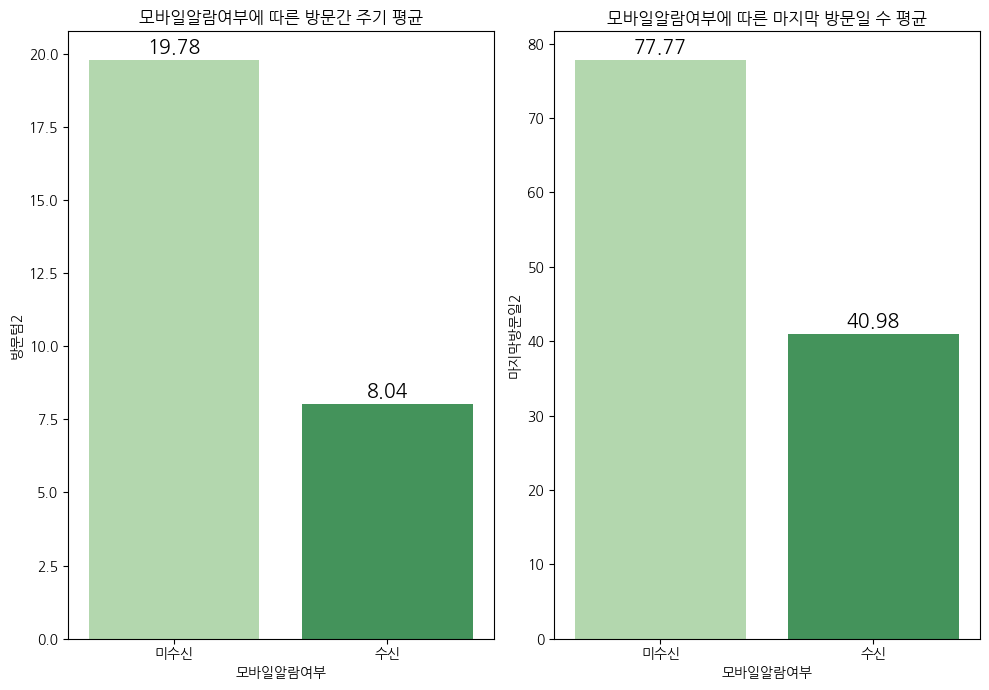

In [89]:
p1 = df_member3.pivot_table(index = '모바일알람여부', values = '방문텀2', aggfunc='mean').reset_index()
p2 = df_member3.pivot_table(index = '모바일알람여부', values = '마지막방문일2', aggfunc='mean').reset_index()
plt.subplots( figsize=(10,7) )

plt.subplot(1,2,1)
bar_plot1 = sns.barplot(data = p1, x = '모바일알람여부', y = '방문텀2', palette='Greens')
plt.title('모바일알람여부에 따른 방문간 주기 평균')
for p in bar_plot1.patches:
    bar_plot1.annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points', fontsize = 14)

plt.subplot(1,2,2)
plt.title('모바일알람여부에 따른 마지막 방문일 수 평균')
bar_plot2 = sns.barplot(data = p2, x = '모바일알람여부', y = '마지막방문일2', palette='Greens')
for p in bar_plot2.patches:
    bar_plot2.annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points', fontsize = 14)
plt.tight_layout()
plt.show()

In [90]:
df_member3['총구매금액'].sum()/len(df_member3)

281709.7726525314

In [91]:
df4 = df_member3[df_member3['모바일알람여부'] == '수신']

In [92]:
df4['총구매금액'].sum()/len(df4)

915746.0875831485

In [93]:
df4 = df_member3[df_member3['모바일알람여부'] != '수신']
df4['총구매금액'].sum()/len(df4)

228025.2935323383

In [94]:
df2

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,label,공급일자2,월,첫구매 일,일수 차이,첫구매 월,기간
1,2022-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,1,2022-01-01,1,2022-01-01,0,2022-01,-29~1일
2,2022-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,1,2022-01-01,1,2022-01-01,0,2022-01,-29~1일
3,2022-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,1,2022-01-01,1,2022-01-01,0,2022-01,-29~1일
4,2022-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,1,2022-01-01,1,2022-01-01,0,2022-01,-29~1일
8,2022-01-01,246287488,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장C,NaN,11:18,1,2022-01-01,1,2022-01-01,0,2022-01,-29~1일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294639,2022-10-30,743866240,정상회원,축산물,육가공,햄/소시지/훈제,허브맛닭날개양념구이(500g),1.0,19527,매장A,NaN,13:57,1,2022-10-30,10,2022-01-17,286,2022-01,270~300일
294640,2022-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26,1,2022-10-30,10,2022-01-02,301,2022-01,300 초과
294641,2022-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58,1,2022-10-30,10,2022-01-01,302,2022-01,300 초과
294642,2022-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36,1,2022-10-30,10,2022-01-05,298,2022-01,270~300일


In [192]:
import pandas as pd
from scipy import stats
import numpy as np
def mode(series):
    return np.unique(series)[0]

df['요일'] = pd.to_datetime(df['공급일자']).dt.day_name()
p1 = df.pivot_table(index = '회원번호', values = '요일', aggfunc=mode).reset_index()
df_member4 = pd.merge(df_member3,p1,on='회원번호',how='left')
df_member4

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,label,방문텀,방문텀2,마지막방문일,마지막방문일2,요일
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,1,0 days 00:00:00,0,139 days,139,Monday
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,1,0 days 00:00:00,0,18 days,18,Wednesday
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,1,13 days 08:00:00,13,0 days,0,Friday
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,1,11 days 12:00:00,11,0 days,0,Friday
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,1,9 days 21:25:42.857142857,9,25 days,25,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000,40대,1,0 days 00:00:00,0,296 days,296,Friday
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,1,28 days 16:00:00,28,40 days,40,Sunday
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,1,29 days 05:20:00,29,13 days,13,Friday
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,1,13 days 13:42:51.428571428,13,9 days,9,Friday


In [193]:
df['시간'] = pd.to_datetime(df['구매시각'], format='%H:%M').dt.hour
p1 = df.pivot_table(index = '회원번호', values = '시간', aggfunc='mean').reset_index()
p1['시간'] = round(p1['시간'])
df_member4 = pd.merge(df_member4,p1,on='회원번호',how='left')
df_member4

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,label,방문텀,방문텀2,마지막방문일,마지막방문일2,요일,시간
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,1,0 days 00:00:00,0,139 days,139,Monday,16.0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,1,0 days 00:00:00,0,18 days,18,Wednesday,13.0
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,1,13 days 08:00:00,13,0 days,0,Friday,14.0
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,1,11 days 12:00:00,11,0 days,0,Friday,11.0
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,1,9 days 21:25:42.857142857,9,25 days,25,Friday,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000,40대,1,0 days 00:00:00,0,296 days,296,Friday,13.0
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,1,28 days 16:00:00,28,40 days,40,Sunday,16.0
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,1,29 days 05:20:00,29,13 days,13,Friday,14.0
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,1,13 days 13:42:51.428571428,13,9 days,9,Friday,17.0


In [194]:
df_member4.rename(columns={'시간':'선호방문시간','요일':'선호요일'},inplace=True)
df_member4.drop(columns=['방문텀','마지막방문일','label'],inplace=True)
df_member4

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,방문텀2,마지막방문일2,선호요일,선호방문시간
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,0,139,Monday,16.0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,0,18,Wednesday,13.0
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,13,0,Friday,14.0
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,11,0,Friday,11.0
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,9,25,Friday,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000,40대,0,296,Friday,13.0
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,28,40,Sunday,16.0
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,29,13,Friday,14.0
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,13,9,Friday,17.0


In [195]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# 클러스터의 수에 따른 실루엣 계수 계산
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 계수 그래프 시각화
plt.plot(range(2, 11, 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


NameError: name 'X' is not defined

In [ ]:
# np.unique(dbscan_labels)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# 계층적 군집화
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)

# 실루엣 계수 계산
hierarchical_silhouette_score = silhouette_score(X, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette_score}")


In [ ]:
silhouette_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=4)
    hierarchical_labels = hierarchical.fit_predict(X)
    hierarchical_silhouette_score = silhouette_score(X, hierarchical_labels)
    silhouette_scores.append(hierarchical_silhouette_score)

# 실루엣 계수 그래프 시각화
plt.plot(range(2, 11, 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# 추천시스템 멋

In [ ]:
X = merged_data.drop().values
y = merged_data['구매금액'].values

In [ ]:
merged_data

# 워드클라우드

In [ ]:
df2

In [ ]:
p1 = df2.pivot_table(index = '물품소분류',values='구매수량',aggfunc='sum').sort_values(by='구매수량',ascending=False).reset_index()
p1

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [ ]:
import json
import re
# from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [ ]:
word_k = {}
for i in range(len(p1)):
  if p1.iloc[i,1] >= 2:
    word_k[p1.iloc[i,0]] = p1.iloc[i,1]

import numpy as np
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
from PIL import Image
# img = Image.open('/content/word-cloud-g900328f51_1280.png')
# img_array = np.array(img)

wc = WordCloud(font_path=font_path,
              background_color='white',
               width=800, height=600,
              #  mask=img_array
               )
cloud = wc.generate_from_frequencies(word_k)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
key_word = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/BLACKKIWI_2024_05_29 (1).csv').iloc[:,:2]

In [ ]:
word_k = {}
for i in range(len(key_word)):
  if key_word.iloc[i,1] >= 2:
    word_k[key_word.iloc[i,0]] = key_word.iloc[i,1]

import numpy as np
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
from PIL import Image
# img = Image.open('/content/word-cloud-g900328f51_1280.png')
# img_array = np.array(img)

wc = WordCloud(font_path=font_path,
              background_color='white',
               width=800, height=600,
              #  mask=img_array
               )
cloud = wc.generate_from_frequencies(word_k)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
df2.pivot_table(index='월',values='구매금액',aggfunc='sum').plot()

In [ ]:
merged_data[merged_data['구매매장'] == '매장D']['주소'].value_counts()

In [ ]:
merged_data = pd.merge(df_member4,df2[['회원번호','구매매장']],on='회원번호', how= 'left')
merged_data['구매매장'].value_counts()

In [ ]:
df_member4['주소'].value_counts()

# 지도데이터 연습

In [ ]:
m1 = merged_data[merged_data['구매매장'] == '매장C']['주소'].value_counts().reset_index()

In [ ]:
def func1(x):
  if '기타' in x:
    return np.nan
  else:
    return x.split('-')[1]
m1['동'] = m1['주소'].apply(func1)


In [ ]:
m1.dropna(inplace=True)

In [ ]:
def func2(x):
  return x.replace('-',' ')
m1['주소2'] = m1['주소'].apply(func2)

In [ ]:
m1['주소2'].to_csv('동.csv')

In [ ]:
dong = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/동사무소.csv')
dong.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [ ]:
df_m = pd.merge(m1,dong,on='동',how='left').drop(columns=['위도_x','경도_x','주소2_y'])

In [ ]:
# 매장D
# # 변환된 데이터프레임 출력
# print(merged_df)

# 지도 생성 및 시각화
map_center = [37.5665, 126.9780]  # 용인시청 중심 좌표
m = folium.Map(location=map_center, zoom_start=12)

# 데이터포인트 추가
for idx, row in df_m.iterrows():
    folium.CircleMarker(
        location=[row['위도_y'], row['경도_y']],
        popup=f"{row['주소2_x']} ({row['count']})",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# 지도 출력
m

In [ ]:
dong = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/동사무소2.csv')
dong.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
dong

In [ ]:
df_m = pd.merge(m1,dong,on='동',how='left')
df_m

In [ ]:
# # 매장D
# # # 변환된 데이터프레임 출력
# # print(merged_df)
# df_m.dropna(inplace=True)
# df_m.reset_index(drop=True,inplace=True)
# # 지도 생성 및 시각화
# map_center = [37.5665, 126.9780]  # 용인시청 중심 좌표
# m = folium.Map(location=map_center, zoom_start=12)

# # 데이터포인트 추가
# for idx, row in df_m.iterrows():
#     folium.CircleMarker(
#         location=[row['위도'], row['경도']],
#         popup=f"{row['주소2_x']} ({row['count']})",
#         color='blue',
#         fill=True,
#         fill_color='blue'
#     ).add_to(m)

# # 지도 출력
# m

In [ ]:
df_member4

In [ ]:
def mode(series):
    return np.unique(series)[0]

p1 = df.pivot_table(index = '회원번호', values = '구매매장', aggfunc=mode).reset_index()
p1

In [ ]:
df_member4 = pd.merge(df_member4,p1,on='회원번호',how='left')

In [ ]:
df_x = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/member_df.csv')
df_member4 = pd.merge(df_member4,df_x[['회원번호','고객등급']],on='회원번호',how='left')

In [ ]:
df_member4.to_csv('df_member4.csv')

In [105]:
import scipy.stats as st
st.chi2_contingency(pd.crosstab(df2['연령대'],df2['물품소분류']))

Chi2ContingencyResult(statistic=16925.829109813716, pvalue=0.0, dof=3088, expected_freq=array([[6.63236030e-02, 4.12016103e-01, 1.92801171e-04, ...,
        5.97683632e-03, 1.07968656e-01, 2.18250926e-01],
       [1.72125541e+00, 1.06927989e+01, 5.00364945e-03, ...,
        1.55113133e-01, 2.80204369e+00, 5.66413118e+00],
       [4.92658040e+01, 3.06049486e+02, 1.43214546e-01, ...,
        4.43965094e+00, 8.02001460e+01, 1.62118867e+02],
       ...,
       [3.26706910e+01, 2.02957171e+02, 9.49729390e-02, ...,
        2.94416111e+00, 5.31848458e+01, 1.07509367e+02],
       [4.58422427e+00, 2.84781607e+01, 1.33262334e-02, ...,
        4.13113234e-01, 7.46269068e+00, 1.50852962e+01],
       [6.44286429e-01, 4.00244215e+00, 1.87292567e-03, ...,
        5.80606956e-02, 1.04883837e+00, 2.12015185e+00]]))

In [104]:
df2 = pd.merge(df2,df_member4[['회원번호','연령대']],on='회원번호',how='left')

In [112]:
k23 = pd.merge(df2,df_member4['회원번호'],on='회원번호',how='left')

In [117]:
df_member4

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,방문텀2,마지막방문일2,선호요일,선호방문시간
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,0,139,Monday,16.0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,0,18,Wednesday,13.0
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,13,0,Friday,14.0
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,11,0,Friday,11.0
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,9,25,Friday,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000,40대,0,296,Friday,13.0
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,28,40,Sunday,16.0
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,29,13,Friday,14.0
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,13,9,Friday,17.0


In [114]:
st.chi2_contingency(pd.crosstab(k23['연령대'],k23['물품소분류']))

Chi2ContingencyResult(statistic=16925.829109813716, pvalue=0.0, dof=3088, expected_freq=array([[6.63236030e-02, 4.12016103e-01, 1.92801171e-04, ...,
        5.97683632e-03, 1.07968656e-01, 2.18250926e-01],
       [1.72125541e+00, 1.06927989e+01, 5.00364945e-03, ...,
        1.55113133e-01, 2.80204369e+00, 5.66413118e+00],
       [4.92658040e+01, 3.06049486e+02, 1.43214546e-01, ...,
        4.43965094e+00, 8.02001460e+01, 1.62118867e+02],
       ...,
       [3.26706910e+01, 2.02957171e+02, 9.49729390e-02, ...,
        2.94416111e+00, 5.31848458e+01, 1.07509367e+02],
       [4.58422427e+00, 2.84781607e+01, 1.33262334e-02, ...,
        4.13113234e-01, 7.46269068e+00, 1.50852962e+01],
       [6.44286429e-01, 4.00244215e+00, 1.87292567e-03, ...,
        5.80606956e-02, 1.04883837e+00, 2.12015185e+00]]))

In [127]:
df_member4


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,방문텀2,마지막방문일2,선호요일,선호방문시간
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,0,139,Monday,16.0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,0,18,Wednesday,13.0
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,13,0,Friday,14.0
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,11,0,Friday,11.0
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,9,25,Friday,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,1,39246,39246.000000,2.000000,40대,0,296,Friday,13.0
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,28,40,Sunday,16.0
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,29,13,Friday,14.0
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,13,9,Friday,17.0


In [129]:
cond1 = df_member4['조합원상태'] == '정상회원'
t1 = df_member4[cond1]
t1.pivot_table(index='연령대',values='조합원상태', aggfunc='count')

,조합원상태
연령대,
10대,1
20대,52
30대,2120
40대,4429
50대,2515
60대,1431
70대,722
80대,131
90대,10


In [130]:
t1

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,방문텀2,마지막방문일2,선호요일,선호방문시간
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,0,139,Monday,16.0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,0,18,Wednesday,13.0
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,13,0,Friday,14.0
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,11,0,Friday,11.0
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,9,25,Friday,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549,999654592,정상회원,기타-기타,여,47.0,미신청,미수신,normal,1,33387,33387.000000,3.000000,40대,0,292,Tuesday,15.0
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,28,40,Sunday,16.0
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,29,13,Friday,14.0
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,13,9,Friday,17.0


In [133]:
F_list = []
def func2(x):
    if x >= 120:
        return '잠수고객'
    else:
        return '일반고객'

t1['회원상태'] = t1['마지막방문일2'].apply(func2)
t1['회원상태'].value_counts()

회원상태
일반고객    8566
잠수고객    2847
Name: count, dtype: int64

In [134]:
cond1 = t1['배송서비스신청여부'] == '신청'
cond2 = t1['모바일알람여부'] == '수신'
t1['온라인서비스'] = 'X'
t1.loc[cond1|cond2,'온라인서비스'] = 'O'
t1['온라인서비스'].value_counts()

온라인서비스
X    9487
O    1926
Name: count, dtype: int64

In [140]:
for_you = pd.merge(df2,t1,on='회원번호',how='left')

In [166]:
for_you2 = for_you[for_you['구매금액'] >= 0]

In [165]:
for_you2

In [149]:
k2 = df2.pivot_table(index=['월','물품중분류'],values='구매금액',aggfunc='sum').reset_index()
k2['월'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

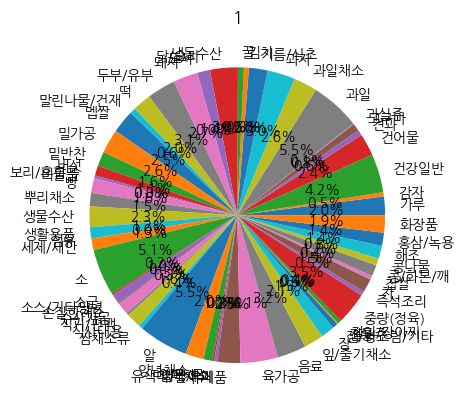

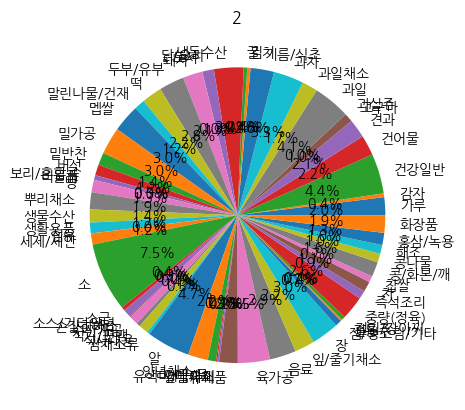

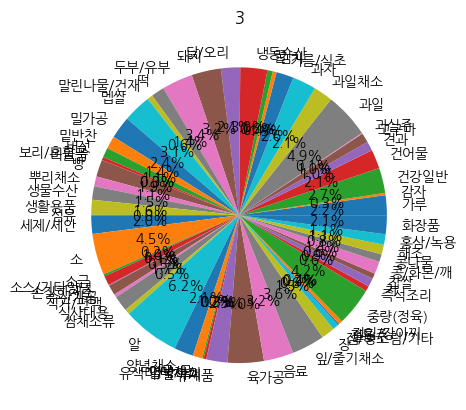

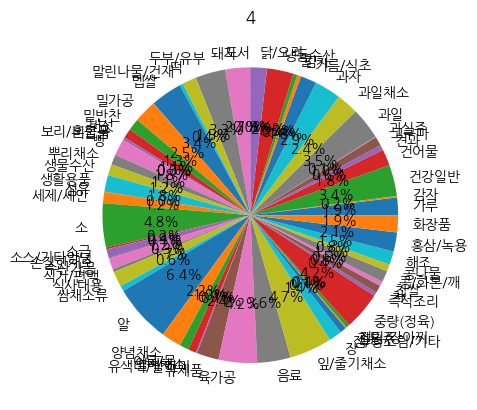

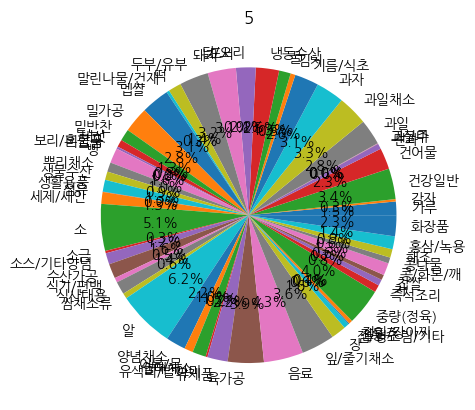

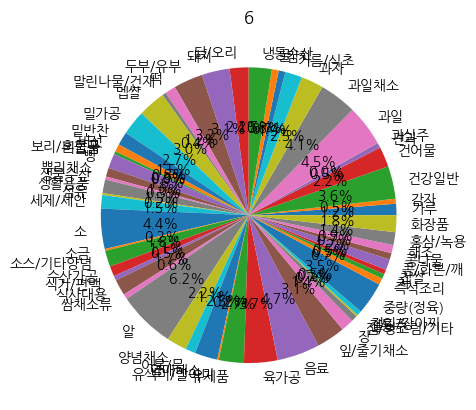

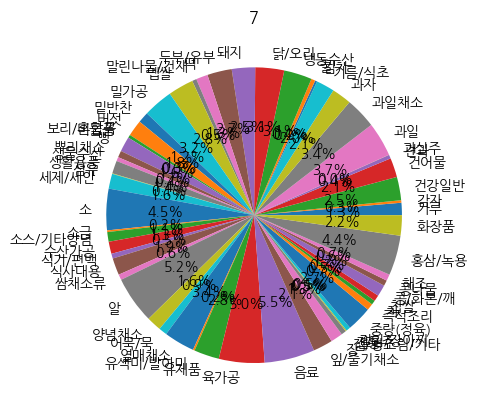

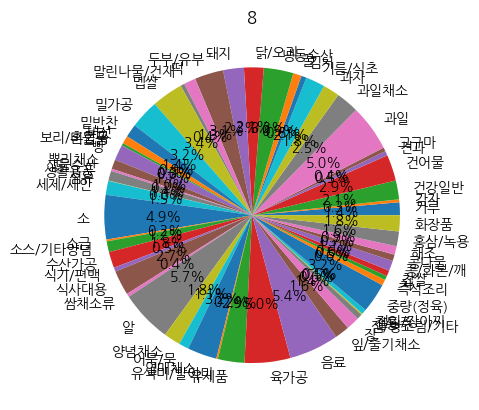

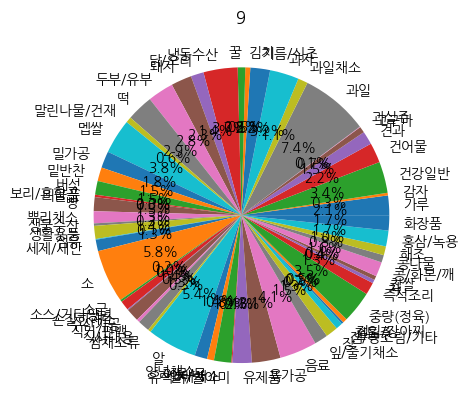

ValueError: Wedge sizes 'x' must be non negative values

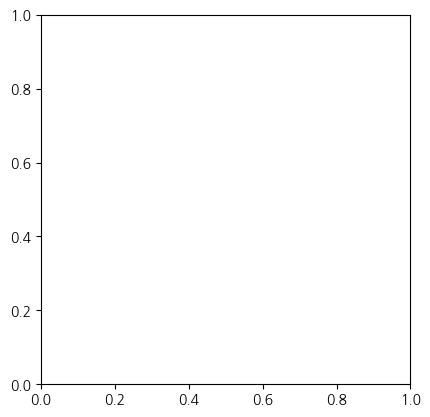

In [150]:
for i in k2['월'].unique():
  p1 = k2[k2['월'] == i]
  plt.pie(p1['구매금액'],labels=p1['물품중분류'],autopct='%.1f%%')
  plt.title(i)
  plt.show()

In [155]:
cond1 = pd.isnull(for_you['반품_원거래일자'])
for_you.loc[cond1,'반품_원거래일자'] = 0

In [167]:
for_you2[for_you2['월'] == 2].pivot_table(index='회원번호',values='구매금액',aggfunc='sum').sort_values('구매금액')

,구매금액
회원번호,
1127956160,766
1533284288,766
843054592,1149
748276096,1149
304196544,1149
...,...
149426560,889050
236805184,976161
744588224,1016553


In [170]:
for_you2.columns

Index(['공급일자', '회원번호', '조합원상태_x', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '반품_원거래일자', '구매시각', 'label', '공급일자2', '월', '첫구매 일',
       '일수 차이', '첫구매 월', '기간', '연령대_x', '조합원상태_y', '주소', '성별', '연령',
       '배송서비스신청여부', '모바일알람여부', 'Gold_member', '총구매횟수', '총구매금액', '1회평균구매금액',
       '1회평균구매수량', '연령대_y', '방문텀2', '마지막방문일2', '선호요일', '선호방문시간', '회원상태',
       '온라인서비스'],
      dtype='object')

In [175]:
for i in range(1,11):
  print(len(for_you2[for_you2['월'] == i].pivot_table(index='회원번호',values='label',aggfunc='sum')))

5057
4789
5030
4887
4915
4779
4841
4819
4789
4736


In [176]:
for_you2.pivot_table(index='월',values='총구매횟수',aggfunc='sum')

,총구매횟수
월,
1,629348.0
2,579124.0
3,618135.0
4,609940.0
5,618684.0
6,607286.0
7,668610.0
8,654640.0
9,592045.0


In [178]:
df_k = pd.read_csv('df_k.csv')

In [182]:
k2 = pd.merge(df2,df_k,on='회원번호',how='left')

In [189]:
for i in k2['고객등급'].unique():
  st.normaltest(k2[k2['고객등급'] == i]['총구매금액'])
  # for j in k2['고객등급']:



ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [190]:
# k2[k2['고객등급'] == 0]
k2['고객등급'].unique()

array([ 4.,  2.,  3.,  5.,  1., nan])